In [5]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


# Path to the Excel file
path = "/content/sample_data/Final_News_DF_Labeled_ExamDataset.xlsx"

# Load the dataset into a DataFrame using read_excel
df = pd.read_excel(path)

# Show the first few rows of the dataframe to check the data
print(df.head())

# Show column names and data types to verify the structure
print(df.info())


      LABEL  according  agency  ahead  alabama  amazon  america  american  \
0  politics          0       0      0        0       0        0         0   
1  politics          0       0      0        0       0        0         0   
2  politics          0       0      0        0       0        0         0   
3  politics          0       0      0        0       0        0         0   
4  politics          0       0      0        0       0        0         0   

   announced  appeared  ...  wolverines  women  work  working  world  wrote  \
0          1         0  ...           0      0     0        0      0      0   
1          0         0  ...           0      0     0        0      0      0   
2          0         0  ...           0      0     0        0      0      0   
3          0         0  ...           0      0     0        0      0      0   
4          0         0  ...           0      0     0        0      0      0   

   year  years  york  young  
0     0      0     0      0  
1 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate the features and labels
X = df.drop(columns=['LABEL'])  # Features: all columns except 'LABEL'
y = df['LABEL']  # Labels: the 'LABEL' column

# Encode the labels using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets to check the split
print("Training data (X_train) shape:", X_train.shape)
print("Testing data (X_test) shape:", X_test.shape)
print("Training labels (y_train) shape:", y_train.shape)
print("Testing labels (y_test) shape:", y_test.shape)

# Print the first few rows of the training and testing sets to check the data
print("\nX_train (first 5 samples):")
print(X_train.head())

print("\ny_train (first 5 labels):")
print(y_train[:5])

print("\nX_test (first 5 samples):")
print(X_test.head())

print("\ny_test (first 5 labels):")
print(y_test[:5])


Training data (X_train) shape: (1194, 300)
Testing data (X_test) shape: (299, 300)
Training labels (y_train) shape: (1194,)
Testing labels (y_test) shape: (299,)

X_train (first 5 samples):
      according  agency  ahead  alabama  amazon  america  american  announced  \
532           0       0      0        0       0        0         0          0   
534           0       0      0        0       0        0         0          0   
1108          0       0      0        0       0        0         0          0   
490           0       0      0        0       0        0         0          0   
933           0       0      0        0       0        0         0          0   

      appeared  apple  ...  wolverines  women  work  working  world  wrote  \
532          0      0  ...           0      0     0        0      0      0   
534          0      0  ...           0      0     0        0      0      0   
1108         1      0  ...           0      0     0        0      0      0   
490        

In [10]:
# For ANN, CNN, and LSTM, we need to reshape the data into the appropriate format
# ANN needs (samples, features)
X_train_ann = X_train
X_test_ann = X_test

# CNN and LSTM need (samples, time_steps, features) because they are sequence models
X_train_cnn_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)


Building ANN model...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,915 (152.01 KB)

 Trainable params: 38,915 (152.01 KB)

 Non-trainable params: 0 (0.00 B)

Training ANN model...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3647 - loss: 1.0758 - val_accuracy: 0.6288 - val_loss: 0.9525
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6244 - loss: 0.9150 - val_accuracy: 0.7224 - val_loss: 0.8528
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7296 - loss: 0.8055 - val_accuracy: 0.7324 - val_loss: 0.7637
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7574 - loss: 0.7103 - val_accuracy: 0.7425 - val_loss: 0.6898
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.6219 - val_accuracy: 0.7525 - val_loss: 0.6392
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.5471 - val_accuracy: 0.7559 - val_loss: 0.6085
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8329 - loss: 0.4784 - val_accuracy: 0.7592 - val_loss: 0.5894
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.4577 - val_accura

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 296, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 148, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 148, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9472)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,212,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,213,315 (4.63 MB)

 Trainable params: 1,213,315 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

Training CNN model...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5610 - loss: 0.9264 - val_accuracy: 0.6789 - val_loss: 0.6811
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7302 - loss: 0.6114 - val_accuracy: 0.7191 - val_loss: 0.6361
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.7798 - loss: 0.5162 - val_accuracy: 0.7592 - val_loss: 0.6331
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8234 - loss: 0.4423 - val_accuracy: 0.7559 - val_loss: 0.6383
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8235 - loss: 0.4375 - val_accuracy: 0.7458 - val_loss: 0.6617
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8328 - loss: 0.3989 - val_accuracy: 0.7358 - val_loss: 0.6938
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8488 - loss: 0.3580 - val_accuracy: 0.7625 - val_loss: 0.6965
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8611 - loss: 0.3262 - va

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,947 (261.51 KB)

 Trainable params: 66,947 (261.51 KB)

 Non-trainable params: 0 (0.00 B)

Training LSTM model...
Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 17s 404ms/step - accuracy: 0.3265 - loss: 1.0986 - val_accuracy: 0.3813 - val_loss: 1.0880
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.3804 - loss: 1.0918 - val_accuracy: 0.4816 - val_loss: 1.0550
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 390ms/step - accuracy: 0.4276 - loss: 1.0600 - val_accuracy: 0.4415 - val_loss: 1.0579
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.3756 - loss: 1.0668 - val_accuracy: 0.3712 - val_loss: 1.0512
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 391ms/step - accuracy: 0.4171 - loss: 1.0652 - val_accuracy: 0.4916 - val_loss: 1.0249
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 380ms/step - accuracy: 0.4304 - loss: 1.0515 - val_accuracy: 0.4950 - val_loss: 1.0324
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.4376 - loss: 1.0707 - val_accuracy: 0.3712 - val_loss: 1.0495
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 388ms/step - accuracy: 0.3755 - 

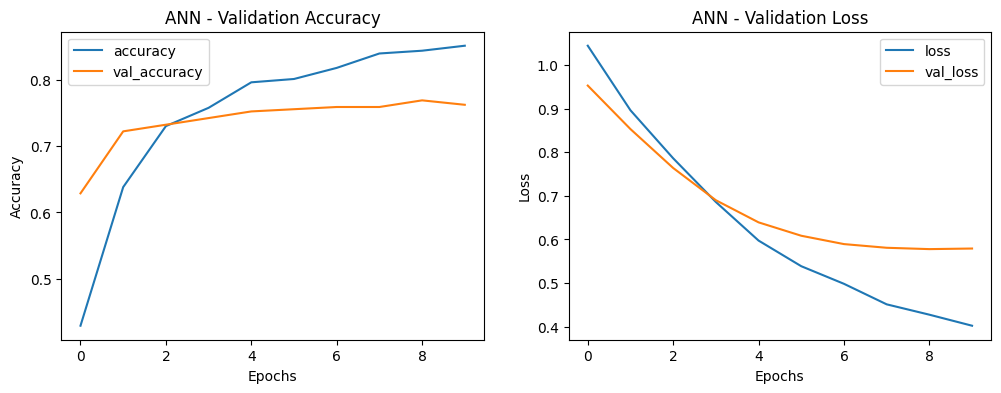

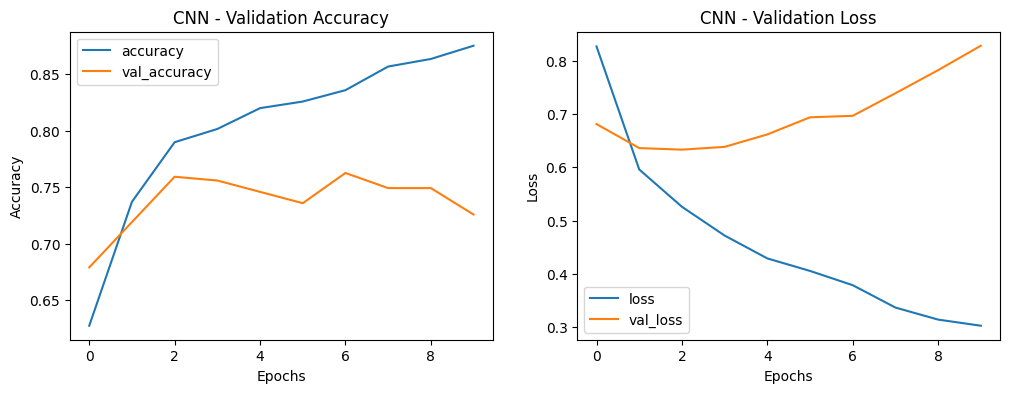

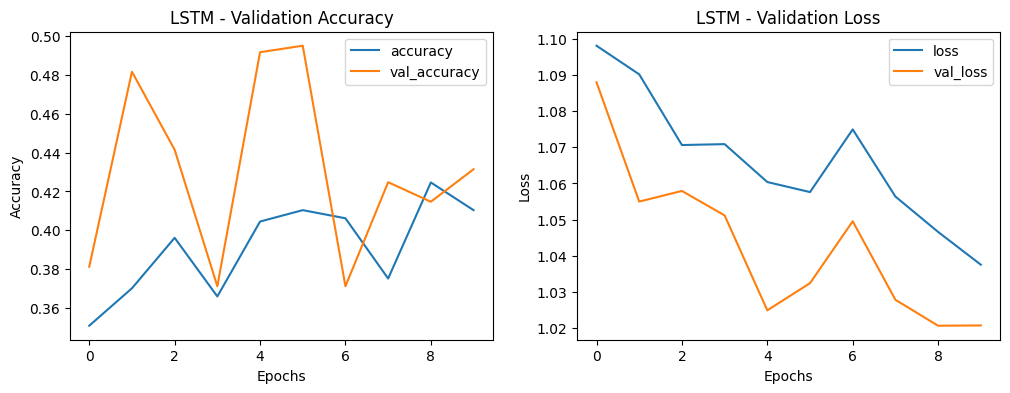

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


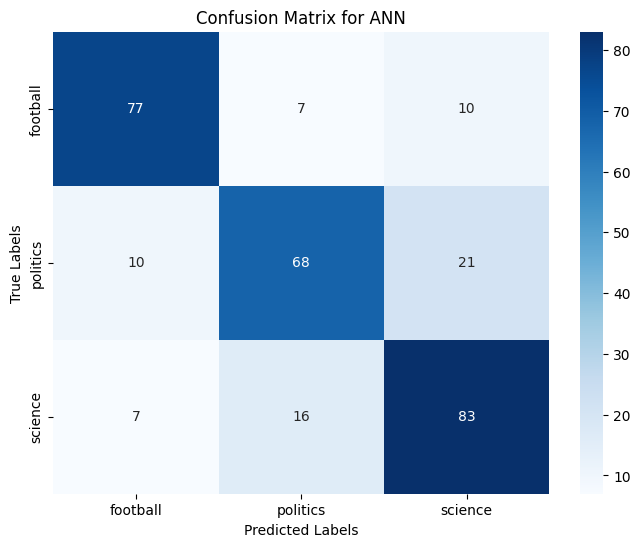

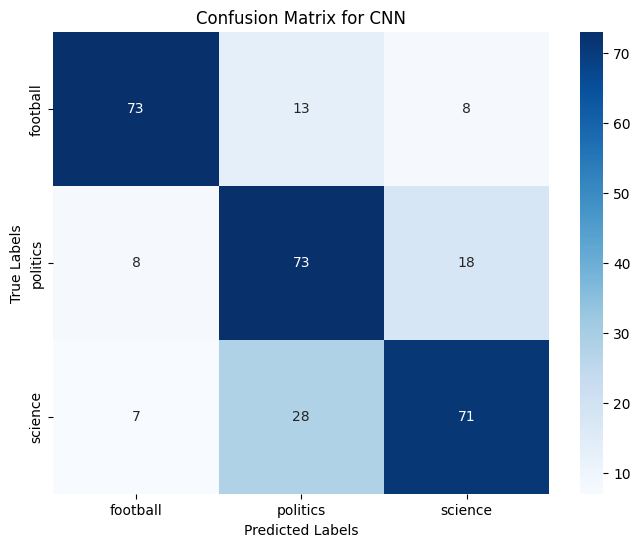

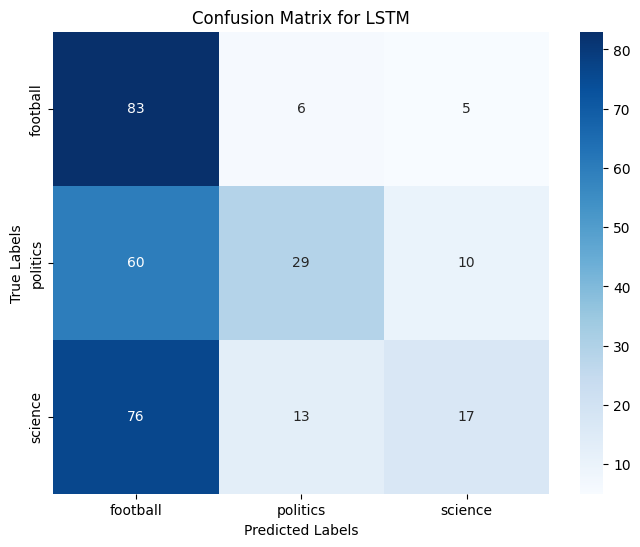

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7507 - loss: 0.5810 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7304 - loss: 0.8078
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.4469 - loss: 1.0250
ANN Accuracy: 0.7625418305397034
CNN Accuracy: 0.7257525324821472
LSTM Accuracy: 0.4314381182193756


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming NumCols is the number of features in the data (columns in X_train)
NumCols = X_train.shape[1]
input_dim = NumCols + 1  # Input dimension for the embedding layer
output_dim = 32  # Embedding output dimension

# --- ANN Model ---
print("Building ANN model...")
My_ANN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_dim=NumCols, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 categories: football, science, politics
])

My_ANN_Model.summary()

loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
My_ANN_Model.compile(
    loss=loss_function,
    metrics=["accuracy"],
    optimizer='adam'
)

# Train the ANN model
print("Training ANN model...")
Hist_ANN = My_ANN_Model.fit(X_train_ann, y_train, epochs=10, validation_data=(X_test_ann, y_test))

# --- CNN Model ---
print("Building CNN model...")
My_CNN_Model = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(64, 5, activation='relu', input_shape=(NumCols, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 categories: football, science, politics
])

My_CNN_Model.summary()

My_CNN_Model.compile(
    loss=loss_function,
    metrics=["accuracy"],
    optimizer='adam'
)

# Train the CNN model
print("Training CNN model...")
Hist_CNN = My_CNN_Model.fit(X_train_cnn_lstm, y_train, epochs=10, validation_data=(X_test_cnn_lstm, y_test))

# --- LSTM Model ---
print("Building LSTM model...")
My_LSTM_Model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(NumCols, 1), dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 categories: football, science, politics
])

My_LSTM_Model.summary()

My_LSTM_Model.compile(
    loss=loss_function,
    metrics=["accuracy"],
    optimizer='adam'
)

# Train the LSTM model
print("Training LSTM model...")
Hist_LSTM = My_LSTM_Model.fit(X_train_cnn_lstm, y_train, epochs=10, validation_data=(X_test_cnn_lstm, y_test))

# --- Plotting Results ---
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{model_name} - Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{model_name} - Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Plot the training history for all models
plot_history(Hist_ANN, "ANN")
plot_history(Hist_CNN, "CNN")
plot_history(Hist_LSTM, "LSTM")

# --- Confusion Matrices ---
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Evaluate and plot confusion matrices for each model
ann_predictions = np.argmax(My_ANN_Model.predict(X_test_ann), axis=1)
cnn_predictions = np.argmax(My_CNN_Model.predict(X_test_cnn_lstm), axis=1)
lstm_predictions = np.argmax(My_LSTM_Model.predict(X_test_cnn_lstm), axis=1)

# Plot confusion matrices
plot_confusion_matrix(y_test, ann_predictions, "ANN")
plot_confusion_matrix(y_test, cnn_predictions, "CNN")
plot_confusion_matrix(y_test, lstm_predictions, "LSTM")

# Print accuracy scores for each model
ann_accuracy = My_ANN_Model.evaluate(X_test_ann, y_test)
cnn_accuracy = My_CNN_Model.evaluate(X_test_cnn_lstm, y_test)
lstm_accuracy = My_LSTM_Model.evaluate(X_test_cnn_lstm, y_test)

print(f"ANN Accuracy: {ann_accuracy[1]}")
print(f"CNN Accuracy: {cnn_accuracy[1]}")
print(f"LSTM Accuracy: {lstm_accuracy[1]}")
